<a href="https://colab.research.google.com/github/adnan855570/Breast_Cancer_Detection_uisng_ANN/blob/main/Breast_Cancer_Detection_uisng_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Dataset

In [ ]:
# Step 1: Load the dataset
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/wdbc.data', header=None)

# Set proper column names based on UCI's documentation
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
df.columns = columns

# Display first few rows
df.head()


,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Preprocessing: Clean and Encode

In [ ]:
# Step 2: Preprocessing
from sklearn.preprocessing import LabelEncoder

# Drop the ID column
df.drop('ID', axis=1, inplace=True)

# Encode 'M' as 1 and 'B' as 0
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])  # M=1, B=0

# Split into features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']


# Normalize & Split Dataset

In [ ]:
# Step 3: Normalize and split the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalize feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Build the ANN Model

In [ ]:
# Step 4: Build ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Compile & Train the Model

In [ ]:
# Step 5: Compile and train the model
from tensorflow.keras.callbacks import EarlyStopping

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Use early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=16, callbacks=[early_stop], verbose=1)


Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6447 - loss: 0.5820 - val_accuracy: 0.9121 - val_loss: 0.4023
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9039 - loss: 0.4021 - val_accuracy: 0.9451 - val_loss: 0.2839
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9473 - loss: 0.2491 - val_accuracy: 0.9560 - val_loss: 0.2104
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9728 - loss: 0.1990 - val_accuracy: 0.9560 - val_loss: 0.1661
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9446 - loss: 0.1698 - val_accuracy: 0.9670 - val_loss: 0.1375
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9707 - loss: 0.1167 - val_accuracy: 0.9670 - val_loss: 0.1218
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9573 - loss: 0.1361 - val_accuracy: 0.9780 - val_loss: 0.1110
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9777 - loss: 0.0815 - val_accuracy: 0.9780 - 

# Evaluate the Model

In [ ]:
# Step 6: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9759 - loss: 0.0642 
Test Accuracy: 0.9737


# Classification Report

In [ ]:
# Step 7: Prediction and metrics
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# Confusion Matrix Visualization

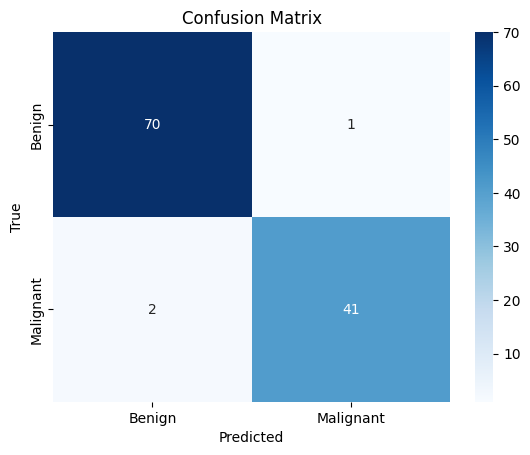

In [ ]:
# Step 8: Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',

            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
